In [149]:
# for Spotipy
import spotipy # don't forget to write: pip install spotipy on gitbash or cmd or whatever
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials
import json
import sys

# Regular python
import pandas as pd
import numpy as np

# For scraping
import requests # For downloading the website
from bs4 import BeautifulSoup # For parsing the website

# For time
import time # make computer go to sleep
import random  # for random numbers
import datetime as dt



# Graphing
from dfply import *
from plotnine import *
import matplotlib.pyplot as plt

# Modeling
from sklearn.tree import DecisionTreeRegressor # Select a model (right now the model doesn't matter)
from sklearn.model_selection import train_test_split # Train-test split
from sklearn.model_selection import KFold # K-fold Cross validation
from sklearn.naive_bayes import GaussianNB # Gaussian
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV
import sklearn.preprocessing as pp
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For Evaluating Model Perfromance
import sklearn.metrics as m
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import cross_validate

# Partial Dependency Plot
from pdpbox import pdp

In [132]:
# Parse JSON
data = {
    "clientID" : "bc9f3e2fa5994153b808dec97aadb7c8",
    "clientSecret" : "ffb21ad5ba2d486ba533d42aa4091892" 
}
with open('authorization.json', 'w') as outfile:
    json.dump(data, outfile)

In [133]:
# Reading JSON file as a dataframe
# clients = pd.read_json("authorization.json")

# Reading JSON file
# Python Parsing JSON 
with open('authorization.json') as json_file:
    data = json.load(json_file)
data # shows contents of json

{'clientID': 'bc9f3e2fa5994153b808dec97aadb7c8',
 'clientSecret': 'ffb21ad5ba2d486ba533d42aa4091892'}

In [134]:
myURI = "spotify:playlist:4UzXak95ei1TL0VddWOWni"

data = [
    {
        "uri" : "spotify:playlist:4UzXak95ei1TL0VddWOWni",
        "like": True
    },
    {
        "uri" : "spotify:playlist:4Fa86B4AHUbsFDSqfCq3Wo",
        "like" : False
    },
    {
        "uri" : "spotify:artist:7JJFJc0AqAeSKo0MeAmEMe",
        "like" : True
    }
]
with open("testSpotify.json", "w") as outfile:
    json.dump(data, outfile)
    


playlistIndex = 2
# Opening testSpotify json file and reading
# basically, getting the first playlist (Boys Love)
playlists = json.load(open("testSpotify.json"))
playlistURI = playlists[playlistIndex]["uri"]
# like = playlists[playlistIndex]["like"]


# Setting Up Crediential Manager And Token

In [135]:
# Getting my credentials
credentials = json.load(open('authorization.json'))
clientID = credentials['clientID']
clientSecret = credentials['clientSecret']

# Setting up manager and client or something..
clientCredManager = SpotifyClientCredentials(client_id = clientID, client_secret = clientSecret)


credentials = oauth2.SpotifyClientCredentials(
        client_id= clientID,
        client_secret = clientSecret)

token = credentials.get_access_token()
sp = spotipy.Spotify(client_credentials_manager = clientCredManager, auth=token)
#spotify = spotipy.Spotify(auth=token)

## Grab Songs From Each Album (By Album ID/URI)

In [136]:
def getTracks(albumURI, artistUri):
    '''
    Gets all the tracks from a specific album using album URI
    
    @param string albumURI the uri of the album
    @return list a list of albums
    
    '''
    # Spawn an empty dictionary for each new albumURI
    albums = {}

    #Create keys-values of empty lists inside nested dictionary for album
    # so we have keys: album, track_number, id, name, uri
    albums['album'] = [] #create empty list
    albumName = sp.album(albumURI)["name"]
    albums["artist"] = []
    albumArtist = sp.artist_albums(artistUri, album_type='album')["items"][0]["artists"][0]["name"]
    
    albums['trackNumber'] = []
    albums['id'] = []
    albums['name'] = []
    albums['uri'] = []
    

    tracks = sp.album_tracks(albumURI) #pull data on album tracks
    # wow tracks is a mess...
    # For every album
    for i in range(len(tracks['items'])): #for each song track
        #print("i = " + str(i) + " " + albumNames[i])

        albums['album'].append(albumName) #append album name tracked via album_count
        albums["artist"].append(albumArtist)
        # Added track number
        albums['trackNumber'].append(tracks['items'][i]['track_number'])

        # Added ID
        albums['id'].append(tracks['items'][i]['id'])

        # Added the track name
        albums['name'].append(tracks['items'][i]['name'])

        # Added track URI
        albums['uri'].append(tracks['items'][i]['uri'])
    return albums

#albumURI = 'spotify:album:6DpIyaMgt5p9HlGd1c0LDM'
#albums = getTracks(albumURI)        
#albums
#print(albums[albumURI])


# albumURI = 'spotify:album:6DpIyaMgt5p9HlGd1c0LDM'
#albums[albumURI] = getTracks('spotify:album:6DpIyaMgt5p9HlGd1c0LDM')
# albums[albumURI]


# albums = {}
# # album_count = 0
# for URI in albumURIs:
# #     #print("URI  = " + URI)
#     albums[URI] = getTracks(URI)
#     print("Album " + str(albumNames[album_count]) + " songs has been added to spotify_albums dictionary")
#     album_count += 1 #Updates album count once all tracks have been added

In [8]:
def getAudioFeatures(albumURI, albums):
    #Add new key-values to store audio features
    #albums = {}
    albums[albumURI]['acousticness'] = []
    albums[albumURI]['danceability'] = []
    albums[albumURI]['duration_ms'] = []
    albums[albumURI]['energy'] = []
    albums[albumURI]["explicit"] = []
    albums[albumURI]['instrumentalness'] = []
    albums[albumURI]['key'] = []
    albums[albumURI]['liveness'] = []
    albums[albumURI]['loudness'] = []
    albums[albumURI]['mode'] = []
    albums[albumURI]['speechiness'] = []
    albums[albumURI]['tempo'] = []
    albums[albumURI]['timeSignature'] = []
    albums[albumURI]['valence'] = []
    albums[albumURI]['popularity'] = []
    
    
    
    
    
    #create a track counter
    track_count = 0
    
    for track in albums[albumURI]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)[0]
        #Append to relevant key-value
        albums[albumURI]['acousticness'].append(features['acousticness'])
        albums[albumURI]['danceability'].append(features['danceability'])
        albums[albumURI]["duration_ms"].append(features["duration_ms"])
        albums[albumURI]['energy'].append(features['energy'])
        albums[albumURI]['instrumentalness'].append(features['instrumentalness'])
        albums[albumURI]["key"].append(features["key"])
        albums[albumURI]['liveness'].append(features['liveness'])
        albums[albumURI]['loudness'].append(features['loudness'])
        albums[albumURI]["mode"].append(features["mode"])
        albums[albumURI]['speechiness'].append(features['speechiness'])
        albums[albumURI]['tempo'].append(features['tempo'])
        albums[albumURI]["timeSignature"].append(features["time_signature"])
        albums[albumURI]['valence'].append(features['valence'])
        
        
        
        
        #popularity is stored elsewhere
        pop = sp.track(track)
        albums[albumURI]['popularity'].append(pop['popularity'])
        
        # Add whether it is explicit
        albums[albumURI]["explicit"].append(pop["explicit"])
        track_count+=1
    return albums




In [17]:

# For the artist Ed Sheeran
# artists = {"Ed Sheeran", "Boy Sompob", "Billkin", "Cardi B"}
# sleep_min = 2
# sleep_max = 5
# df = pd.DataFrame()
# for artist in artists:
    
#     result = sp.search(artist) #search query


#     #Extract Artist's uri
#     artistUri = result['tracks']['items'][0]['artists'][0]['uri']
# #Pull all of the artist's albums

# # Grab the albums dictionary
#     albums = sp.artist_albums(artistUri, album_type='album')

# # Store artist's albums' names' and uris in separate lists
#     albumNames = []
#     albumURIs = []

#     for i in range(len(albums['items'])):
#         albumNames.append(albums['items'][i]['name'])
#         albumURIs.append(albums['items'][i]['uri'])
    
#     albums = {}
# # album_count = 0
#     requestCount = 0
#     for URI in albumURIs:
# #     #print("URI  = " + URI)
#         albums[URI] = getTracks(URI, artistUri)
#         albums = getAudioFeatures(URI, albums)
#         requestCount += 1
    
#         if requestCount % 5 == 0:
#             time.sleep(np.random.uniform(sleep_min, sleep_max))
#     dic_df = {}
#     dic_df['album'] = []
#     dic_df["artist"] = []
#     dic_df['trackNumber'] = []
#     dic_df['id'] = []
#     dic_df['name'] = []
#     dic_df['uri'] = []
#     dic_df['acousticness'] = []
#     dic_df['danceability'] = []
#     dic_df["duration_ms"] = []
#     dic_df['energy'] = []
#     dic_df["explicit"] = []
#     dic_df['instrumentalness'] = []
#     dic_df["key"] = []
#     dic_df['liveness'] = []
#     dic_df['loudness'] = []
#     dic_df["mode"] = []
#     dic_df['speechiness'] = []
#     dic_df['tempo'] = []
#     dic_df["timeSignature"] = []
#     dic_df['valence'] = []
#     dic_df['popularity'] = []
#     # for every album
#     for albumURI in albums: 
#         # for every feature in each album
#         for feature in albums[albumURI]:
#             dic_df[feature].extend(albums[albumURI][feature])
#     df1 = pd.DataFrame.from_dict(dic_df)
#     df = pd.concat([df,df1], ignore_index=True)
    

    
#     # for every URI in all the Ed Sheeran Albums
#     #for URI in albums:

# #         albums = getAudioFeatures(URI, albums)
# #         requestCount += 1
    
# #     if requestCount % 5 == 0:
# #         time.sleep(np.random.uniform(sleep_min, sleep_max))
# #albums
# print(len(df))


# # Sorting by popularity, then drops duplicates by name
# final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
# #df.sort_values('popularity', ascending=False).drop_duplicates('uri').sort_index()
# print(len(final_df))
# #final_df.to_csv("albums.csv")
# # for instance, albumNames[3] = (Deluxe)
# # and albumURIs[3] = whatever album URI Deluxe is
# #Keep names and uris in same order to keep track of duplicate albums

360
165


## Adding This Data Into Dataframe

In [164]:
# dic_df = {}
# dic_df['album'] = []
# dic_df["artist"] = []
# dic_df['trackNumber'] = []
# dic_df['id'] = []
# dic_df['name'] = []
# dic_df['uri'] = []
# dic_df['acousticness'] = []
# dic_df['danceability'] = []
# dic_df["duration_ms"] = []
# dic_df['energy'] = []
# dic_df['instrumentalness'] = []
# dic_df["key"] = []
# dic_df['liveness'] = []
# dic_df['loudness'] = []
# dic_df["mode"] = []
# dic_df['speechiness'] = []
# dic_df['tempo'] = []
# dic_df["timeSignature"] = []
# dic_df['valence'] = []
# dic_df['popularity'] = []
# for albumURI in albums: 
#     for feature in albums[albumURI]:
#         dic_df[feature].extend(albums[albumURI][feature])
# df = pd.DataFrame.from_dict(dic_df)
# df

,album,artist,trackNumber,id,name,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,timeSignature,valence,popularity
0,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,1,3JVLKqscpTZC0KjPTIp7Ki,Introduction + Nanana - Live,spotify:track:3JVLKqscpTZC0KjPTIp7Ki,0.3630,0.428,371516,0.4540,0.000281,5,0.3730,-13.504,1,0.0453,104.816,4,0.305,15
1,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,2,2vnwvaCorpIdxzi790ytAx,สั่น - Live,spotify:track:2vnwvaCorpIdxzi790ytAx,0.6340,0.310,272000,0.4500,0.000128,11,0.8320,-14.203,1,0.0842,208.051,4,0.556,14
2,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,3,382yPnw2naMUF3OilwY5I5,พระอาทิตย์เที่ยงคืน - Live,spotify:track:382yPnw2naMUF3OilwY5I5,0.3340,0.571,258000,0.5090,0.000005,0,0.1480,-12.779,1,0.0541,120.564,4,0.346,13
3,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,4,5oLIk8lbI7zAZd60920Fvl,ถ้าหากรักมีจริง - Live,spotify:track:5oLIk8lbI7zAZd60920Fvl,0.5790,0.514,236500,0.4680,0.300000,2,0.2360,-15.632,1,0.0435,93.058,4,0.596,11
4,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,5,079JaaFsC78SRsHaQwheYg,รักฉัน...ไม่มีวันเปลี่ยน - Live,spotify:track:079JaaFsC78SRsHaQwheYg,0.3930,0.544,273435,0.4650,0.000001,2,0.2160,-14.060,1,0.0377,95.647,4,0.632,12
5,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,6,5GvKct9twDFZDJnUeWwRFk,Jigsaw Heart - Live,spotify:track:5GvKct9twDFZDJnUeWwRFk,0.2440,0.463,248172,0.2260,0.000033,5,0.3680,-15.222,1,0.0339,92.664,4,0.364,12
6,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,7,0fsdwMcNWPIW0HGD49sGjI,รักไม่ได้ - Live,spotify:track:0fsdwMcNWPIW0HGD49sGjI,0.7770,0.367,300500,0.0504,0.000027,5,0.1840,-19.649,1,0.0410,177.286,3,0.213,10
7,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,8,1KbKQIbDKYD6HDdmE9kLji,เรื่องจริงกับความฝัน - Live,spotify:track:1KbKQIbDKYD6HDdmE9kLji,0.5940,0.359,238000,0.1320,0.000027,0,0.4050,-17.473,1,0.0486,77.693,4,0.300,11
8,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,1,4c1GnBAZcGeChFIGAWavF0,ย้อน - Live,spotify:track:4c1GnBAZcGeChFIGAWavF0,0.6480,0.510,296000,0.1620,0.000000,9,0.1790,-15.676,1,0.0397,136.775,3,0.284,11
9,The Luckiest Boy And The Luckiest Fans (Live),Ed Sheeran,2,2odAd626HMTHYOnChqml7R,ขอ - Live,spotify:track:2odAd626HMTHYOnChqml7R,0.5900,0.633,232000,0.4910,0.000040,9,0.7800,-14.158,1,0.0807,110.039,4,0.531,12


## Eradicating Duplicates

In [74]:
# print(len(df))
# # Sorting by popularity, then drops duplicates by name
# final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
# #df.sort_values('popularity', ascending=False).drop_duplicates('uri').sort_index()
# print(len(final_df))
# #final_df.to_csv("albums.csv")

360
165


# Scraping Website

In [138]:
def getDF(url):
    '''
    Gets the dataframe (data table) from a given url
    @param url the specified url
    @return the data frame
    '''
    page = requests.get(url)

    if page.status_code == 200:
        table = pd.read_html(page.text)
        table = table[9]
        # Drop the first 2 "rows"
        table.drop([0, 1], inplace = True)

        # Rewrite the columns
        table.columns = ["ThisWeekPosition",
                        "PrevWeekPosition",
                        "ThisWeekPeakPosition",
                        "ThisWeekTotalWeeks",
                        "TitleArtist",
                        "EntryDate",
                        "EntryPosition",
                        "PeakPosition",
                        "TotalWeeks"]
        return table
    return None

def getDate(url):
    '''
    Gets the current year from the URL
    @param url the specified url
    @return the datetime object
    '''
    page = requests.get(url)

    if page.status_code == 200:
        table = pd.read_html(page.text)
        date = table
        date = table[5][1]
        #So get the exact date
        date = date[0]

        # Transform it into a datetime object
        date = dt.datetime.strptime(date, '%B  %d,  %Y')
        # So this is the year
        return date.date()
    return None

# url = "http://www.umdmusic.com/default.asp?Lang=English&Chart=A&ChDate=20201105&ChMode=P"
# mainDF = getDF(url)
# #mainDF = mainDF.reset_index(drop=True)
# # grabbing only the new songs
# mainDF = (
#             mainDF >>
#             filter_by(X.PrevWeekPosition == "NEW")

#             ).reset_index(drop = True)



In [139]:
def getSongAndArtistFromUMD(row):
    '''
    Gets the artist name from a row (from the TitleArtist column)
    
    @param row the row from the dataframe
    @return the artist name, in a list
    
    '''
    
    indexOfAnd = len(row)
    indexOfCaps = len(row)
    indexOfFeat = len(row)
    indexOfSlash =len(row) 
    indexToStop = len(row)
    indexStartCaps = len(row)
    song = ""
    artist = ""
    #print()
    #print(row)
    
    # Trying to find the index of the CAPS words 
    # CAPS words = the artist
#     i = 0
#     while (i < len(row)):
#         if (row[i].isupper() and row[i] != "OK" and len(row[i])):
#             indexOfCaps = row.index(row[i])
#            # print("indexOfCAPS: ", indexOfCaps)
#             i = len(row)
#         i = i + 1
        
    
    #print("song: ", song)
    # Think: row[indexOfCaps : len(row)] = the elements from the CAPS index until the end
    
    #for s in row[indexOfCaps: len(row)]:
    for s in row:
        
        # Checking for CAPS letters,
        # or for artist names
        if (s.isupper() and len(s) > 1 and s != "OK" and s != "EW"):
            indexOfCaps = row.index(s)
            indexStartCaps = min(indexOfCaps, indexStartCaps)
        
        # Checking if there are any featured artists
        if "feat" in s:
            indexOfFeat = row.index(s)
            indexToStop = min(indexOfFeat, indexToStop)
            
#     if any("feat" in s for s in row[indexOfCaps: len(row)]):
#         #print("Feat Index: ", row.index("feat"))
#         indexOfFeat = row.index("feat")
#         indexToStop = min(row.index("feat"), indexToStop)

        elif s == "&":
            indexOfAnd = row.index(s)
            indexToStop = min(indexOfAnd, indexToStop)
            
        elif s == "/":
            indexOfSlash = row.index(s)
            indexToStop = min(indexOfSlash, indexToStop)
            
    # Checking if there are any &s in artist name
#     if any("&" in s for s in row[indexOfCaps: len(row)]):
# #     if (s == "&" for s in row[indexOfCaps: len(row)]):
#         try:
#             indexOfAnd = row.index("&")
#         except ValueError:
#             print("Oops! Cannot find &")
#         indexToStop = min(indexToStop, indexOfAnd)
#         #print("& index ", row.index("&"))
        
    # Checking if there are any / in artist name
#     if any("/" in s  for s in row[indexOfCaps: len(row)]):
# #     if (s == "/" for s in row[indexOfCaps: len(row)]):

#         try:
#             indexOfSlash = row.index("/")
#         except ValueError:
#             print("Oops! Cannot find /")
#         indexToStop = min(indexOfSlash, indexToStop)
        #print("Slash Index: ", indexOfSlash)
    
#     elif any("/" in s for s in row):
    # finding the index of the ARTIST NAME, ED SHEERAN, BOY SOMPOB
    
    #indexToStop = min(abs(indexOfAnd), abs(indexOfFeat), abs(indexOfSlash))
    #print("index To Stop ", indexToStop)
    indexToStop = min(indexToStop, indexOfAnd, indexOfFeat, indexOfSlash)
    song = row[0: indexStartCaps]
    song = " ".join(song)
    artist = row[indexStartCaps:indexToStop]
    artist = " ".join(artist)
    #print("Artist:", artist)
    return song, artist

# songList = []
# artistList = []
# # for every row in the column TItleArtist: 
# for row in mainDF["TitleArtist"]:
#     song, artist = getSongAndArtistFromUMD(row.split(" "))
#     songList.append(song)
#     artistList.append(artist)
# #print(pd.Series(songList))
# mainDF["Song"] = pd.Series(songList)
# mainDF["Artist"] = pd.Series(artistList)
#print(mainDF["Song"])

In [140]:
prevLinks = []
# HTML path on how to get the previous link
prevLinkPath = "body > table:nth-child(3) > tr:nth-child(2) > td:nth-child(2) > table:nth-child(5) > tr > td > a"

currentLink = "http://www.umdmusic.com/default.asp?Lang=English&Chart=A&ChDate=20201105&ChMode=P"
mainDF = getDF(currentLink)

year2020 = dt.datetime.strptime("2020", "%Y").year
year2018 = dt.datetime.strptime("2018", "%Y").year
Oct = dt.datetime.strptime("Oct", "%b").month
date = getDate(currentLink)

mainDF["ContemporaryDate"] = date
# Then add the date to the mainDF


page = requests.get(currentLink)

soup = BeautifulSoup(page.content, "html.parser")

# Get the previous link
prevLink = "http://www.umdmusic.com/" + soup.select(prevLinkPath)[0]["href"]
# Update date
date = getDate(prevLink)
currentYear = date.year
currentMonth = date.month
currentLink = prevLink

# while (currentMonth >= Oct):
while (currentYear > year2018):

    page = requests.get(currentLink)

    soup = BeautifulSoup(page.content, "html.parser")

    # Spawn a dataframe
    currentDF = getDF(currentLink)
    currentDF["ContemporaryDate"] = date
    # stack
    mainDF = pd.concat([mainDF, currentDF], ignore_index = True)
    
    # Grab only the new songs
    mainDF = (
            mainDF >>
            filter_by(X.PrevWeekPosition == "NEW")

            ).reset_index(drop = True)
    
    prevLink = "http://www.umdmusic.com/" + soup.select(prevLinkPath)[0]["href"]
    prevLinks.append(prevLink)

    # getDF() function
    # Move on to the previous link
    currentLink = prevLink
    date = getDate(currentLink)
    currentMonth = date.month
    currentYear = date.year
    time.sleep(random.uniform(.5,3))

## Respawn Token

This is to ensure that token does not expire on you and you won't run on error code.

In [141]:
# Setting up manager and client or something..
clientCredManager = SpotifyClientCredentials(client_id = clientID, client_secret = clientSecret)


credentials = oauth2.SpotifyClientCredentials(
        client_id= clientID,
        client_secret = clientSecret)

token = credentials.get_access_token()
sp = spotipy.Spotify(client_credentials_manager = clientCredManager, auth=token)
#spotify = spotipy.Spotify(auth=token)

In [142]:
def toQuery(artist, song):
    '''
    Helper method that transforms an artist and song into 
    a query string
    
    @param string artist the artist's name
    @param string song the name of the song
    @return a string of both the artist's name and song name
    '''
    return artist + " " + song

In [80]:
mainDF.head()

,ThisWeekPosition,PrevWeekPosition,ThisWeekPeakPosition,ThisWeekTotalWeeks,TitleArtist,EntryDate,EntryPosition,PeakPosition,TotalWeeks,ContemporaryDate
0,18,NEW,18,1,Chingy (It's Whatever) DIGGA D,2020-10-29,18,18,8,2020-10-29
1,19,NEW,19,1,Lonely JUSTIN BIEBER & BENNY BLANCO,2020-10-29,19,17,8,2020-10-29
2,29,NEW,29,1,Hold CHUNKZ & YUNG FILLY,2020-10-29,29,29,4,2020-10-29
3,44,NEW,44,1,Only You Freestyle HEADIE ONE & DRAKE,2020-10-29,44,44,3,2020-10-29
4,58,NEW,58,1,Happiness LITTLE MIX,2020-10-29,58,58,2,2020-10-29


## Adding Audio Features To Ultimate Music Database Dataframe

In [143]:
def getTrackFeaturesList(id):
    '''
    Gets the track features of each track id
    
    @param string ID the id of the track
    @return list of all the audio features of the track, in list form.
    
    '''
    meta = sp.track(id)
    features = sp.audio_features(id)

    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    trackNumber = meta["track_number"]
    release_date = meta['album']['release_date']
    duration_ms = meta['duration_ms']
    popularity = meta['popularity']
    
    uri = meta["uri"]
    explicit = 1 * meta["explicit"]
    

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    key = features[0]["key"]
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    mode = features[0]["mode"]
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    timeSignature = features[0]['time_signature']
    valence = features[0]["valence"]

#     track = [album, artist, trackNumber, id, name, uri, release_date, duration_ms, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    track = [album, artist, trackNumber, id, name, uri, release_date, acousticness, danceability, duration_ms, energy,
            explicit, instrumentalness, key, liveness, loudness, mode, popularity, speechiness, tempo, timeSignature,
            valence]
    return track

In [144]:
tracks = []
for rowI in range(mainDF.shape[0]):
    row = mainDF.iloc[rowI, :]
    titleArtist = row["TitleArtist"]
    
    # The column TitleArtist in the main_df is messy.
    # Extract the song and artist names
    song, artist = getSongAndArtistFromUMD(titleArtist.split(" "))
#     artist = row["Artist"]
#     song = row["Song"]
    query = toQuery(artist, song)
    #song, artist = getSongAndArtistFromUMD(row.split(" "))
    results = sp.search(query, type = "track")
    if (len(results["tracks"]["items"]) == 0): 
        # There will be 22 columns in total
#         track = [np.nan for i in range(23)]

        track = [np.nan for i in range(23)]
        track[1] = artist
        track[4] = song
    else:
        id = results["tracks"]["items"][0]["id"]
        track = getTrackFeaturesList(id)
        isHit =  1
        # Append 1 to the last column for isHit
        # And 1 = song is top 50
        # And 0 = song is below top 50
#         if int(row["ThisWeekPosition"]) > 50:
#             isHit = 0        
        track.append(isHit)
    time.sleep(random.uniform(.5,3))
    tracks.append(track)
df = pd.DataFrame(tracks, columns = ['album', 'artist', 'trackNumber', "id", "name", "uri", 'release_date', "acousticness",
                                      'danceability', "duration_ms", 'energy', "explicit", 'instrumentalness', "key", 
                                     'liveness', 'loudness', "mode", "popularity", 'speechiness', 'tempo', 'time_signature',
                                    "valence", "isHit"])

    

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=7CH8J4ulT49UfZwSDSkSZA:
 Max Retries, reason: too many 503 error responses

1420

Let's see the NAs.

In [82]:
(df >>
    filter_by(X.id.isna()) >>
     select(X.album, X.artist, X.id, X.name, X.uri, X.danceability)
)

,album,artist,id,name,uri,danceability
49,NaN,MACHINE GUN KELLY,NaN,Forget Me Not,NaN,NaN
54,NaN,EVERTON FC,NaN,Spirit Of The Blues,NaN,NaN
74,NaN,SIMBA,NaN,Loose,NaN,NaN
77,NaN,MILLIONZ,NaN,Lagga,NaN,NaN
210,NaN,BLACKPINK,NaN,How You Like It,NaN,NaN
274,NaN,FREDO,NaN,Hickory Dickory Dock,NaN,NaN
336,NaN,PLAYBOI CARTI,NaN,At Meh,NaN,NaN
359,NaN,SIMBA,NaN,Rover,NaN,NaN
450,NaN,TOKYO'S REVENGE,NaN,Goodmornoingtokyo,NaN,NaN
475,NaN,LEWIS CAPALDI,NaN,Hodl Me While You Wait,NaN,NaN


There are some songs who are NA because Spotify couldn't find them. Spotify does not have all the songs in the universe.

Since we have no information on these songs, let's delete them.

In [83]:
dfNoNA = (
    df >>
    filter_by(~X.id.isna())
#     select(X.album, X.artist, X.id, X.name, X.uri, X.danceability)
)
dfNoNA.isna().sum()

album               0
artist              0
trackNumber         0
id                  0
name                0
uri                 0
release_date        0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
time_signature      0
valence             0
isHit               0
dtype: int64

Good. We were able to eradicate all the rows who had NAs/illegal songs.

Since Spotipy has a replication problem, let's remove duplicates by grabbing the most popular duplicate song. (https://rareloot.medium.com/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330)

In [84]:
dfNoNA = dfNoNA.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
# Let's write this UMD df into a csv file
dfNoNA.to_csv("UMD.csv")

## Respawn Token

This is to prevent tokens from expiring and spawning errors.

In [120]:
# Setting up manager and client or something..
clientCredManager = SpotifyClientCredentials(client_id = clientID, client_secret = clientSecret)


credentials = oauth2.SpotifyClientCredentials(
        client_id= clientID,
        client_secret = clientSecret)

token = credentials.get_access_token()
sp = spotipy.Spotify(client_credentials_manager = clientCredManager, auth=token)
#spotify = spotipy.Spotify(auth=token)

## Grabbing Negative Cases (Songs Who Never Made It On UK's Top 100 Hits)

Now let's grab some more songs who did not make it onto the UMD website.

Usually, these songs come from independent or small artists.

I asked my friends from all around the world for any artist and song recommendations, searched up these artists, and inputted the latest album link into a list. I wanted to include songs that reminds me of my friends.

In [121]:


def getTrackIDs(album_url):
    '''
    Get all the track IDs from a playlist/album link
    
    @param String playlist_id the link of the playlist/album
    @return list ids the list of IDs of each track/song
    
    '''
    ids = set()
    user = album_url.split(":")[2]
    
    albumList = sp.album(album_url)
    
    for item in albumList['tracks']['items']:
        track = item['name']
        ids.add(item['id'])
    return ids

def toList(aSet):
    '''
    Transforms a set into a list
    
    @param set aSet just a set
    @param list a list version of this set
    
    '''
    alist = [elem for elem in aSet]
    return alist

# Finding Songs Who Were Never A Hit In UK

In [122]:
url = "https://www.albumoftheyear.org/2020/releases/"
urls = ["https://www.albumoftheyear.org/2020/releases/?page=2", 
        "https://www.albumoftheyear.org/2020/releases/?page=3"
       #"https://www.albumoftheyear.org/2020/releases/?page=4"
       ]
albumTitles = []
artistTitles = []


page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")
artistTitles = [artist.get_text() for artist in soup.find_all(class_ = "artistTitle")]
albumTitles = [title.get_text() for title in soup.find_all(class_ = "albumTitle")]

for url in urls:
    page = requests.get(url)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content, "html.parser")


        # A list of all the artists who came out in 2020.
        # I'm so proud of you!
        nextArtists = [artist.get_text() for artist in soup.find_all(class_ = "artistTitle")]
        
        # A list of all the albums who came out in 2020
        nextAlbums = [title.get_text() for title in soup.find_all(class_ = "albumTitle")]
        
        # Extend the lists
        artistTitles.extend(nextArtists)
        # A list of all the albums who came out in 2020.
        albumTitles.extend(nextAlbums)

tracks = []
# for every artist
for index in range(len(artistTitles)):
    
    # if the artist is not yet in this UMD dataframe
    if artistTitles[index] not in dfNoNA.artist.unique():
        artist = artistTitles[index]
        album = albumTitles[index]
        query = toQuery(artist, album)
            
        if len(sp.search(query, type = "album")["albums"]["items"]) > 0:
            album_uri = sp.search(query, type = "album")["albums"]["items"][0]["uri"]

            trackIDSet = getTrackIDs(album_uri)
            trackIDList = toList(trackIDSet)

        # loop over track ids 
        
        for i in range(len(trackIDList)):
            time.sleep(random.uniform(.5,3))
            track = getTrackFeaturesList(trackIDList[i])

            # for isHit
            track.append(0)
            tracks.append(track)

# create dataset
otherSongs = pd.DataFrame(tracks, columns = ['album', 'artist', 'trackNumber', "id", "name", "uri", 'release_date', "acousticness",
                                      'danceability', "duration_ms", 'energy', "explicit", 'instrumentalness', "key", 
                                     'liveness', 'loudness', "mode", "popularity", 'speechiness', 'tempo', 'time_signature',
                                    "valence", "isHit"])
# Because Spotify has a duplication problem
# Eradicate duplicate songs
otherSongs = otherSongs.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
otherSongs.to_csv("otherSongs.csv", sep = ',')

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=5hnOzmFuGltDDAm008jFDh:
 Max Retries, reason: too many 503 error responses

## Respawn Token

In [37]:
# Setting up manager and client or something..
clientCredManager = SpotifyClientCredentials(client_id = clientID, client_secret = clientSecret)


credentials = oauth2.SpotifyClientCredentials(
        client_id= clientID,
        client_secret = clientSecret)

token = credentials.get_access_token()
sp = spotipy.Spotify(client_credentials_manager = clientCredManager, auth=token)
#spotify = spotipy.Spotify(auth=token)

<ipython-input-37-7084fb1531e8>:9: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.


In [42]:
print(otherSongs.shape)
print(dfNoNA.shape)


(1365, 23)
(1132, 23)


In [43]:
fullSongs = pd.concat([dfNoNA, otherSongs], ignore_index = True)
print(fullSongs.shape)
# Eradicate duplicate songs
fullSongs = fullSongs.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
fullSongs.to_csv("fullSongs.csv")
print(fullSongs.shape)


(2497, 23)
(2481, 23)


In [4]:
# fullSongs = pd.read_csv("fullSongs.csv")
fullSongs.head()

,Unnamed: 0,album,artist,trackNumber,id,name,uri,release_date,acousticness,danceability,...,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,isHit
0,0,Chingy (It’s Whatever),Digga D,1.0,6afrGc4NBIQEObX1S8DCPy,Chingy (It’s Whatever),spotify:track:6afrGc4NBIQEObX1S8DCPy,2020-10-15,0.3240,0.730,...,8.0,0.3840,-8.188,0.0,73.0,0.3380,141.983,4.0,0.7050,1.0
1,1,Lonely (with benny blanco),Justin Bieber,1.0,4y4spB9m0Q6026KfkAvy9Q,Lonely (with benny blanco),spotify:track:4y4spB9m0Q6026KfkAvy9Q,2020-10-16,0.8640,0.631,...,11.0,0.1160,-7.071,0.0,95.0,0.0398,79.859,4.0,0.0927,1.0
2,2,Hold,Chunkz,1.0,7vNuWM68PF5O5rBWtWXvnl,Hold,spotify:track:7vNuWM68PF5O5rBWtWXvnl,2020-10-16,0.1570,0.766,...,1.0,0.0935,-8.370,0.0,67.0,0.0441,98.019,4.0,0.5600,1.0
3,3,Confetti,Little Mix,5.0,4efdhHdTAS3sYJnI0mjHDc,Happiness,spotify:track:4efdhHdTAS3sYJnI0mjHDc,2020-11-06,0.0484,0.642,...,11.0,0.0934,-6.289,0.0,71.0,0.0377,125.932,4.0,0.4910,1.0
4,4,Love Scars: The 5 Stages Of Emotions (Deluxe),Yung Bleu,1.0,3wJ1OyP3Fugmi8t41e1zQ6,You're Mines Still,spotify:track:3wJ1OyP3Fugmi8t41e1zQ6,2020-10-16,0.3080,0.613,...,5.0,0.1070,-4.859,0.0,60.0,0.1070,86.782,4.0,0.3420,1.0


## Visualizations

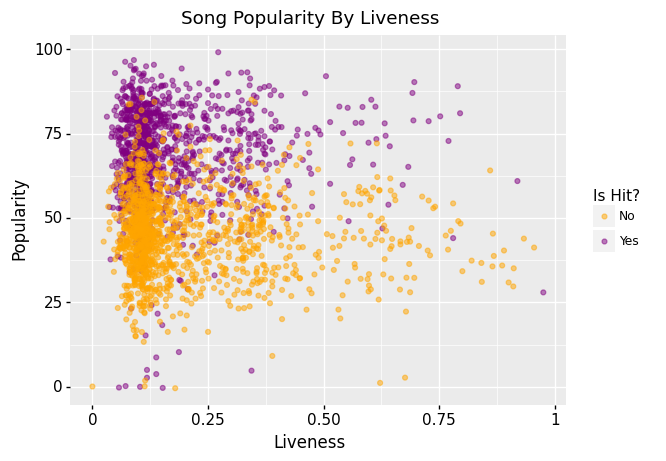

<ggplot: (94610858999)>

In [59]:
(
    fullSongs >>
    select(X.liveness, X.valence, X.popularity, X.isHit) >>
    ggplot() +
    geom_point(aes(x = "liveness", y = "popularity", color = "factor(isHit)"), alpha = 0.5, position = "jitter") +
    labs(
        x = "Liveness",
        y = "Popularity",
        title = "Song Popularity By Liveness",
        color = "Is Hit?"
    ) +
#     theme(axis_text_x = element_text(rotation = 90)) +
    scale_color_manual(labels = ["No", "Yes"],
                      values = ["orange", "Purple"]) +
    theme(axis_text = element_text(color = "black", size = 11)) +
    theme(axis_title = element_text(color = "black", size = 12))
#     theme(figure_size = (30, 10))
)

It appears that most of the songs recorded were in studios and not live. There appears to be an equal number of live songs who were a hit and who were not a hit.

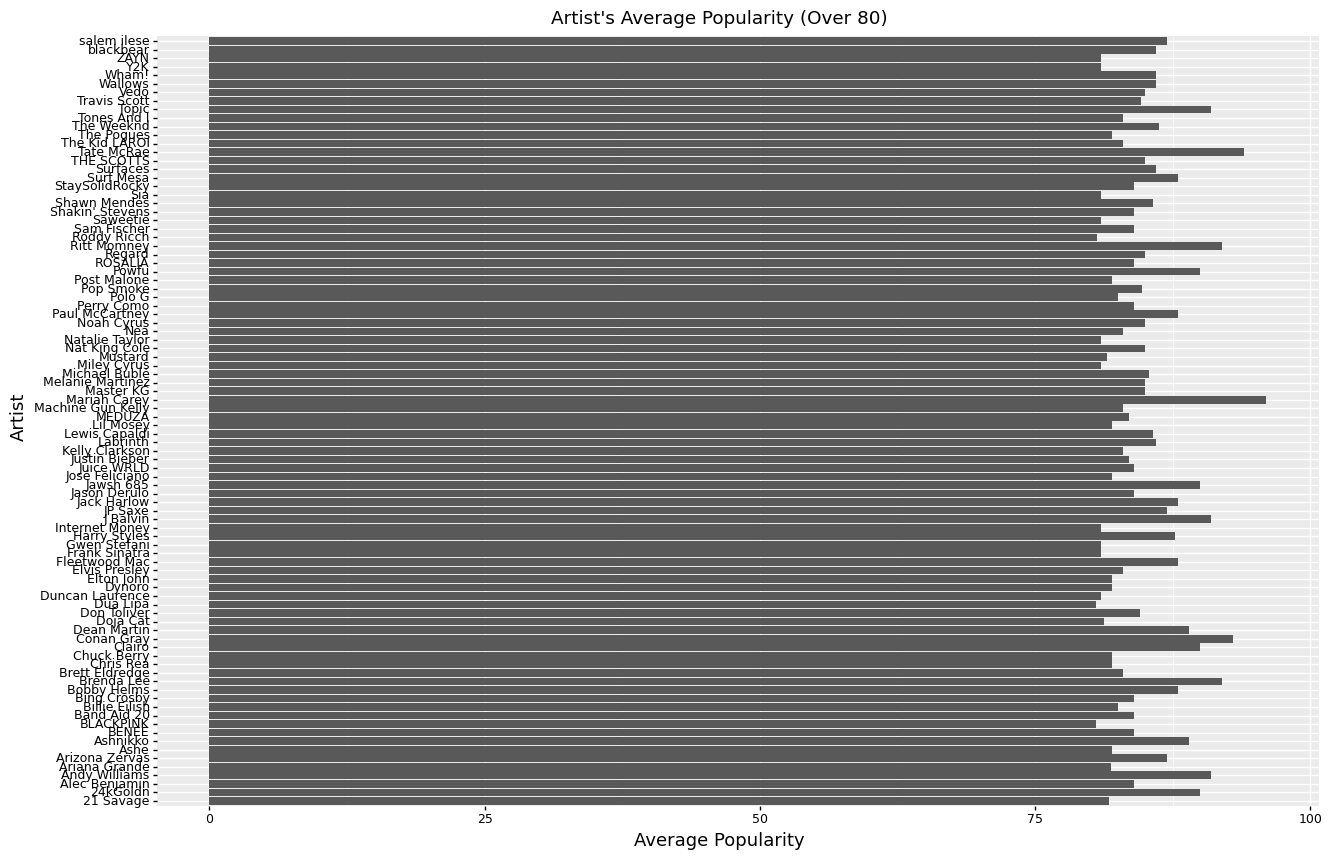

<ggplot: (163663452880)>

In [49]:
(
    fullSongs >>
    group_by(X.artist) >>
    summarize(meanPop = X.popularity.mean()) >>
    arrange(X.meanPop, ascending = True) >>
    mask(X.meanPop > 80) >>
    ggplot() +
    geom_bar(aes(x = "artist", y = "meanPop"), stat = "identity") +
    labs(
        x = "Artist",
        y = "Average Popularity",
        title = "Artist's Average Popularity (Over 80)"
    ) +
    coord_flip() + 
    theme(axis_text = element_text(color = "black", size = 9)) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(figure_size = (15, 10))
)

Here are all the popular artists (artists whose average popularity was over 80).

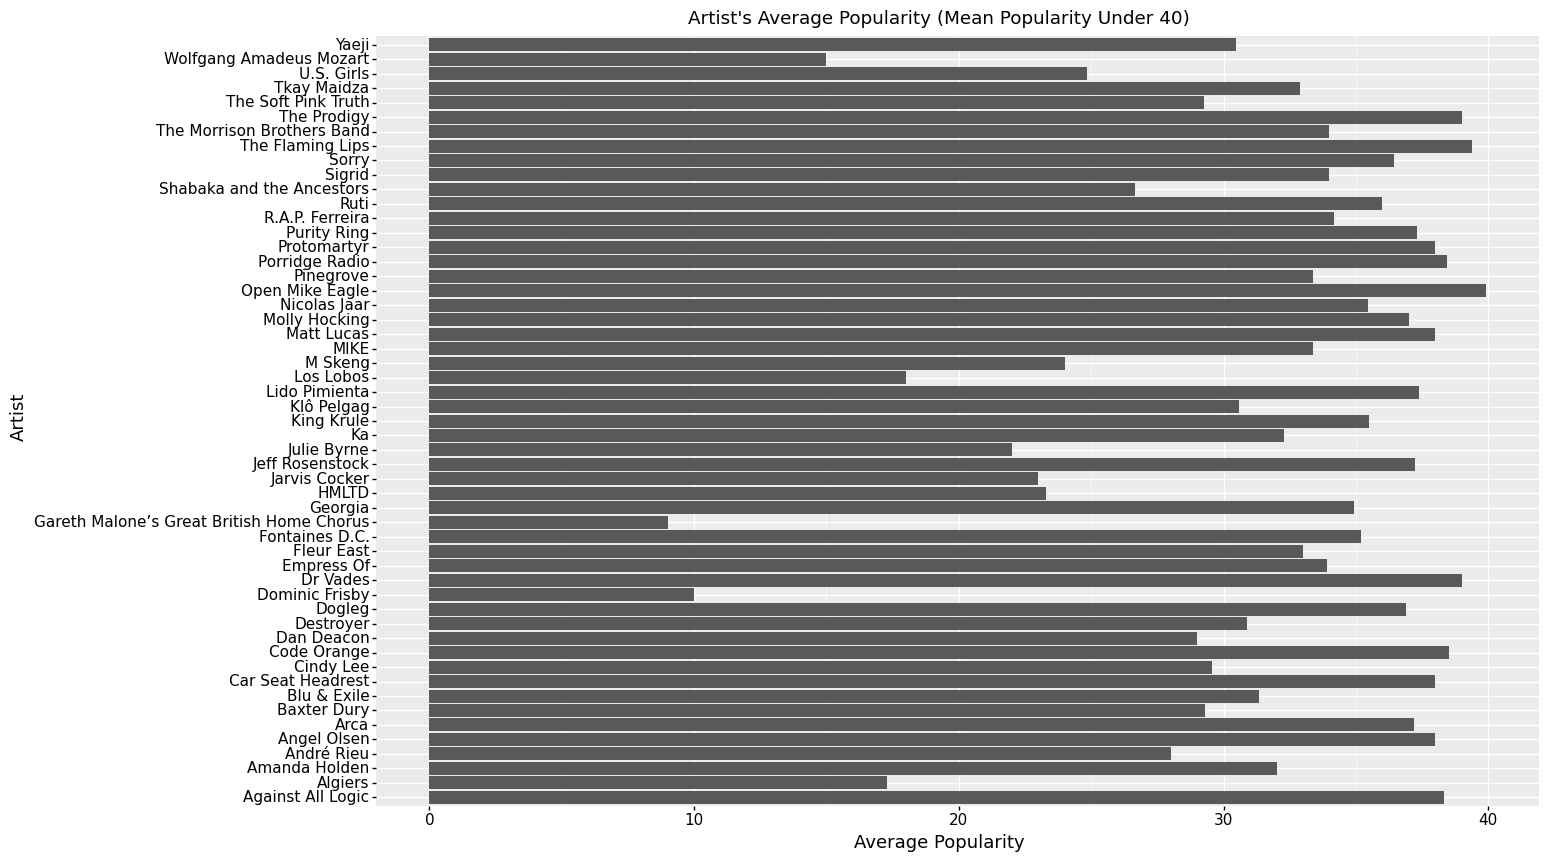

<ggplot: (163662956668)>

In [48]:
(
    fullSongs >>
    group_by(X.artist) >>
    summarize(meanPop = X.popularity.mean()) >>
    arrange(X.meanPop, ascending = True) >>
    mask(X.meanPop < 40) >>
    ggplot() +
    geom_bar(aes(x = "artist", y = "meanPop"), stat = "identity") +
    labs(
        x = "Artist",
        y = "Average Popularity",
        title = "Artist's Average Popularity (Mean Popularity Under 40)"
    ) +
    coord_flip() + 
    theme(axis_text = element_text(color = "black", size = 11)) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(figure_size = (15, 10))
)

Here are the artists whose average popularity was below 40. I am very flattered to see Mozart.

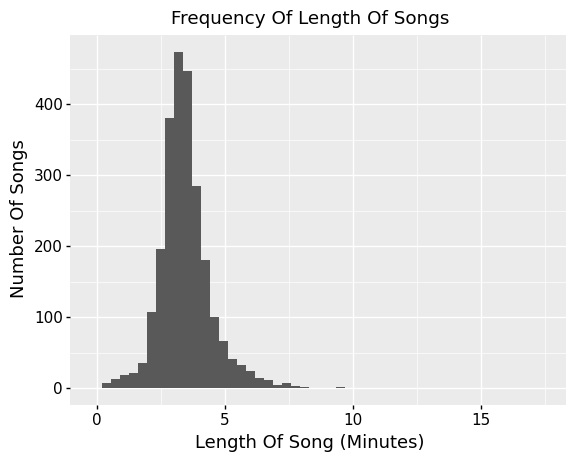

<ggplot: (163663733637)>

In [50]:
(
    fullSongs >>
    
    mutate(duration_sec = X.duration_ms/1000) >>
    mutate(duration_min = X.duration_sec/60) >>
    ggplot() +
    geom_histogram(aes(x = "duration_min"), bins = 50) +
    labs(
        x = "Length Of Song (Minutes)",
        y = "Number Of Songs",
        title = "Frequency Of Length Of Songs"
    ) +
    theme(axis_text = element_text(color = "black", size = 11)) +
    theme(axis_title = element_text(color = "black", size = 13)) 
)

According to this normal histogram, most of the songs' duration is about 3.5 minutes to 4 minutes.

In [7]:
meanMins = (fullSongs >>
 group_by(X.isHit) >>
 mutate(duration_min = X.duration_ms/(1000*60)) >>
 summarize(meanMin = X.duration_min.mean())
)
meanMins

,isHit,meanMin
0,0.0,3.555270
1,1.0,3.338246


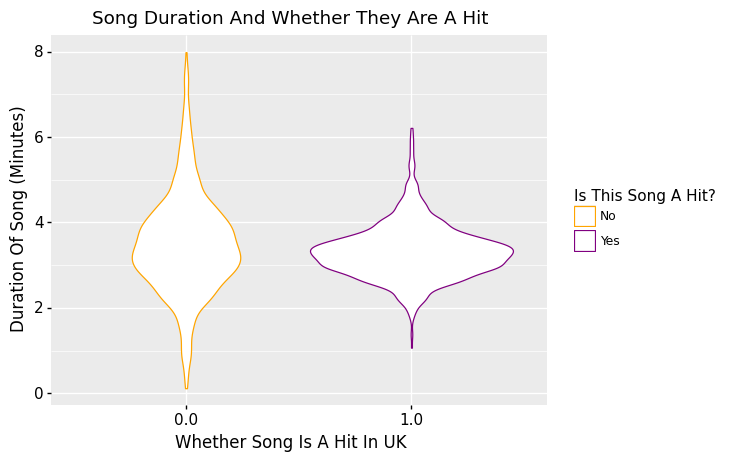

<ggplot: (152927340804)>

In [97]:


(
    fullSongs >>
    mutate(duration_min = X.duration_ms/(1000*60)) >>
    mask(X.duration_min <= 8) >>
    ggplot() +
    geom_violin(aes(x = "factor(isHit)", y = "duration_min", color = "factor(isHit)")) +
    labs(
        x = "Whether Song Is A Hit In UK",
        y = "Duration Of Song (Minutes)",
        title = "Song Duration And Whether They Are A Hit",
        color = "Is This Song A Hit?"
    ) +
#     geom_hline(yintercept = meanMins["meanMin"][0], color = "yellow") +
#     geom_text(label = meanMins["meanMin"][0], position = "stack") +
#     geom_hline(yintercept = meanMins["meanMin"][1], color = "purple") +
    theme(axis_title = element_text(color = "black", size = 12)) +
    theme(axis_text = element_text(color = "black", size = 11)) +
#     scale_x_discrete(labels = ["No", "Yes"]) +
    scale_color_manual(labels = ["No", "Yes"],
                       values = ["Orange", "Purple"])
    
)

Most of the songs who were a hit are mostly about 3.5 minutes long. But the distribution of song duration for the songs who were not a hit is more spread out, more varied.

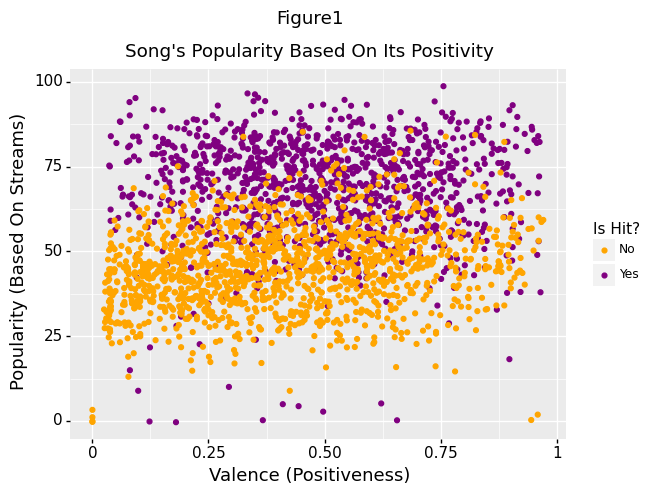

<ggplot: (94614948855)>


In [151]:
p = (
    fullSongs >>
    select(X.valence, X.popularity, X.duration_ms, X.isHit) >>
    ggplot() +
    geom_point(aes(x = "valence", y = "popularity", color = ("factor(isHit)")), position = "jitter") +
    labs(
        x = "Valence (Positiveness)",
        y = "Popularity (Based On Streams)",
        title = "Figure1\n\nSong's Popularity Based On Its Positivity",
        caption = "Figure 1a",
        color = "Is Hit?"
    ) +
#     labs('{:>50}'.format("source: JHU...")) +
    scale_color_manual(values = ["orange", "purple"],
                      labels = ["No", "Yes"]) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(axis_text = element_text(color = "black", size = 11))
#     theme(axis_text = element_text(ha = "left"))
)
ggsave(plot = p, filename = "Data/Popularity_Vs_Valence")
print(p)

There appears to be little correlation between whether a song is a hit and valence of a song. However, popularity is a strong indicator of whether a song becomes a hit or not.

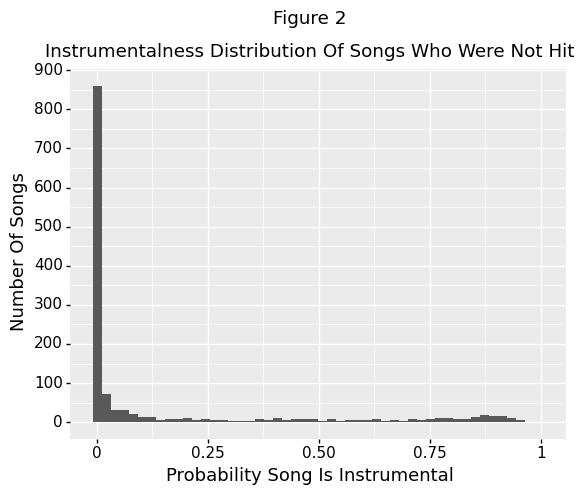

<ggplot: (94617528046)>


In [152]:
p = (
    fullSongs >>
    mask(X.isHit == 0) >>
    select(X.instrumentalness) >>
    ggplot() +
    geom_histogram(aes(x = "instrumentalness"), bins = 50) +
    labs(
        x = "Probability Song Is Instrumental",
        y = "Number Of Songs",
        title = "Figure 2\n\nInstrumentalness Distribution Of Songs Who Were Not Hit"
    ) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(axis_text = element_text(color = "black", size = 11)) +
    scale_y_continuous(
        breaks = [100*num for num in range(10)]
#         limits = [0, 250, 500, 750, 1000]
    )
)
ggsave(plot = p, filename = "Data/Instrumental_Distribute_NonHitSongs")
print(p)


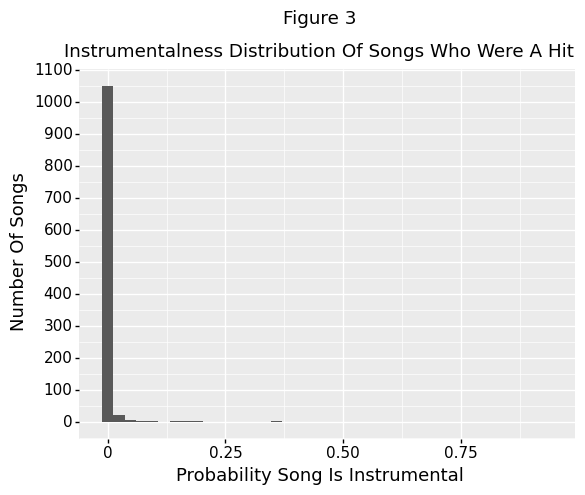

<ggplot: (94617401718)>


In [153]:
p = (
    fullSongs >>
    mask(X.isHit == 1) >>
    select(X.instrumentalness) >>
    ggplot() +
    geom_histogram(aes(x = "instrumentalness"), bins = 40) +
    labs(
        x = "Probability Song Is Instrumental",
        y = "Number Of Songs",
        title = "Figure 3\n\nInstrumentalness Distribution Of Songs Who Were A Hit"
    ) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(axis_text = element_text(color = "black", size = 11)) +
    scale_y_continuous(
        breaks = [100*num for num in range(12)]
#         limits = [0, 250, 500, 750, 1000]
    )
)
print(p)
ggsave(plot = p, filename = "Data/Instrumental_Distribute_HitSongs")

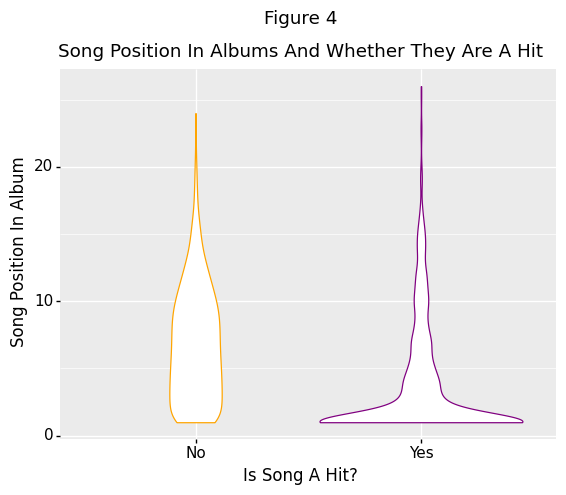

<ggplot: (94614259285)>


In [154]:
p = (
    fullSongs >>
    # Eradicate blatant outliers
    mask(X.trackNumber < 30) >>
    ggplot() +
    # Don't need the legend, so hide it
    geom_violin(aes(x = "factor(isHit)", y = "trackNumber", color = "factor(isHit)"), show_legend = False) +
    labs(
        x = "Is Song A Hit?",
        y = "Song Position In Album",
        title = "Figure 4\n\nSong Position In Albums And Whether They Are A Hit"
    ) +
    theme(axis_title = element_text(color = "black", size = 12)) +
    theme(axis_text = element_text(color = "black", size = 11)) +
#     scale_color_discrete(guide = False) +

    scale_color_manual(labels = ["No", "Yes"],
                       values = ["Orange", "Purple"]) +
    scale_x_discrete(labels = ["No", "Yes"])
)
ggsave(plot = p, filename = "Data/Track_Number_isHit")
print(p)

It appears that most of the songs who were a hit were the first songs in the album. This implies that the closer to the beginning of the album a song is, the more likely it is considered a hit.

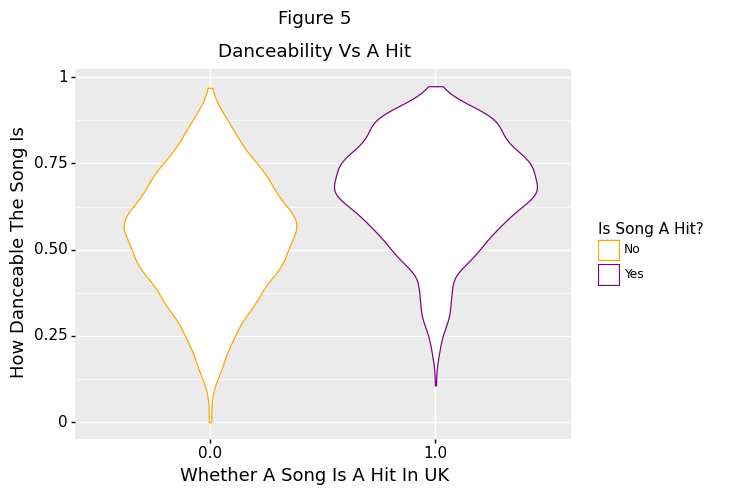

<ggplot: (94616478419)>


In [156]:
p = (
    fullSongs >>
    ggplot() +
    geom_violin(aes(x = "factor(isHit)", y = "danceability",  color = "factor(isHit)")) +
    labs(
        x = "Whether A Song Is A Hit In UK",
        y = "How Danceable The Song Is",
        title = "Figure 5\n\nDanceability Vs A Hit",
        color = "Is Song A Hit?"
    ) +
    scale_color_manual(values = ["orange", "purple"],
                      labels = ["No", "Yes"]) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(axis_text = element_text(color = "black", size = 11))
)
ggsave(plot = p, filename = "Data/Danceability_Vs_isHit")
print(p)

On average, the more danceable a song is, the more likely it will be a hit in the UK.

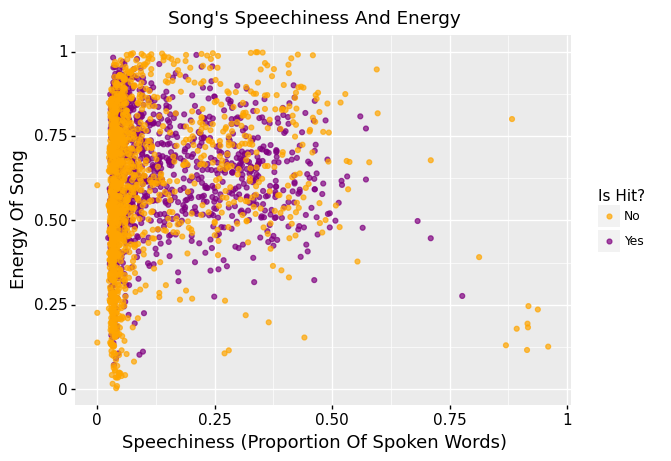

<ggplot: (168825867873)>

In [10]:
(
    fullSongs >>
    ggplot() +
    geom_point(aes(x = "speechiness", y = "energy", color = "factor(isHit)"), alpha = 0.7, position = "jitter") +
    labs(
        x = "Speechiness (Proportion Of Spoken Words)",
        y = "Energy Of Song",
        title = "Song's Speechiness And Energy",
        color = "Is Hit?"
    ) +
    scale_color_manual(values = ["orange", "purple"],
                      labels = ["No", "Yes"]) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(axis_text = element_text(color = "black", size = 11))
)

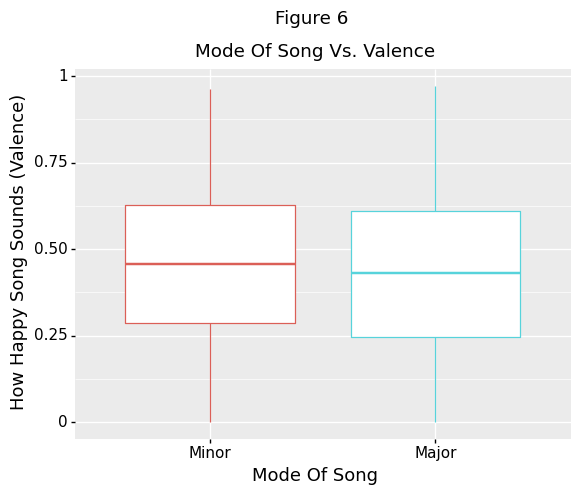

<ggplot: (94610862508)>


In [157]:
p = (
    fullSongs >>
#     group_by(X.mode) >>
    group_by("mode") >>
    #select("mode", X.tempo, X.popularity, X.duration_ms, X.isHit) >>
    ggplot() +
    geom_boxplot(aes(x = "factor(mode)", y = "valence", color = "factor(mode)"), show_legend = False) +
    labs(
        x = "Mode Of Song",
        y = "How Happy Song Sounds (Valence)",
        title = "Figure 6 \n\nMode Of Song Vs. Valence"
    ) +
    scale_x_discrete(values = ["orange", "purple"],
                      labels = ["Minor", "Major"]) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(axis_text = element_text(color = "black", size = 11))
    
)
ggsave(plot = p, filename = "Data/Modality_Vs_Valence")
print(p)

The modality of the song is "the type of scale from which its melodic content is derived" ("Get Audio Features For A Track"). It seems that minor songs in general are a bit more danceable than major songs, which is surprising because typically, minor songs sound more forlorn than major songs. 

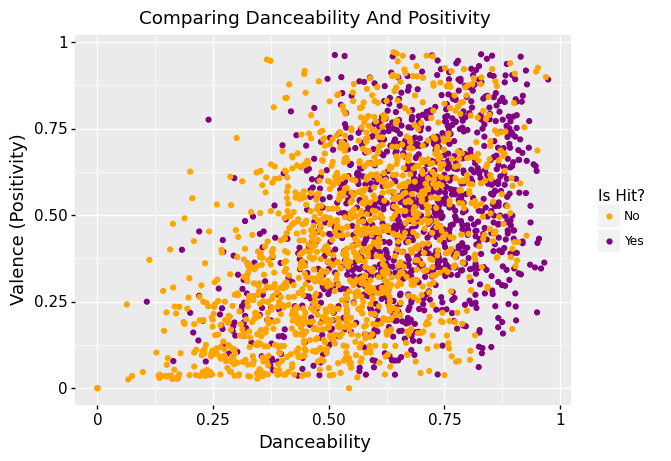

<ggplot: (168828216851)>

In [13]:
(
    fullSongs >>
    ggplot() +
    geom_point(aes(x = "danceability", y = "valence", color = "factor(isHit)"), position = "jitter") +
    labs(
        x = "Danceability",
        y = "Valence (Positivity)",
        title = "Comparing Danceability And Positivity",
        color = "Is Hit?"
    ) +
    scale_color_manual(values = ["orange", "purple"],
                      labels = ["No", "Yes"]) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(axis_text = element_text(color = "black", size = 11))
)

There appears to be little correlation between valence and whether the song becomes a hit. It appears that the more danceable (or upbeat) a song is, the more positive it sounds.

# Modelling

In [3]:
## TODO:
## IDEA: make key into a dummy variable. Do it on fullSongs.copy()
## And then you can split the data.
# fullSongs = pd.read_csv("fullSongs.csv")
# fullSongs = pd.read_csv("fullSongs.csv")
# fullSongsCopy = fullSongs.copy()

In [25]:
fullSongsCopy = fullSongs.copy()
keyDummies = pd.get_dummies(fullSongs["key"], drop_first = True, prefix = "key")
fullSongsCopy = pd.concat([fullSongsCopy, keyDummies], axis = 1)

# We have a random column named Unnamed, so delete it
# also delete the "key"
fullSongsCopy.drop(["Unnamed: 0", "key"], axis = 1, inplace = True)
fullSongsCopy.columns

Index(['album', 'artist', 'trackNumber', 'id', 'name', 'uri', 'release_date',
       'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'time_signature', 'valence', 'isHit', 'key_1.0',
       'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0',
       'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0'],
      dtype='object')

In [44]:
# check the values of  
# each row for each column 
len(fullSongs.artist.unique())

581

There are 581 different artists in this dataframe!

Let's see the top 20 artist..

In [54]:
# Grabbing the top 20 artists
fullSongs.artist.value_counts()[0:20]

Various Artists          31
Bladee                   25
Lil Wayne                24
Big Sean                 21
Bad Bunny                20
NAV                      20
Blu & Exile              20
Moses Sumney             19
100 gecs                 19
D-Block Europe           18
R.A.P. Ferreira          18
Oneohtrix Point Never    17
Kali Uchis               17
HAIM                     16
Glass Animals            16
MIKE                     16
clipping.                16
Dan Deacon               16
Yung Lean                16
Sufjan Stevens           15
Name: artist, dtype: int64

In [26]:
Y = fullSongsCopy.isHit
XData = (fullSongsCopy >> 
         select(~X.isHit)
        )
    

X_train, X_test, Y_train, Y_test = train_test_split(XData, Y, test_size=0.25, random_state = 420)

Before we split the data and run machine learning classification models, note that `popularity` greatly explains whether a song becomes a hit or not in the UK. However, just as whether a song becomes a hit is dependent on streams/listeners' feedback, `popularity` is also determined by the audience. Therefore, before we run the classification models, we will not include `popularity` in the pre-processing.

In [48]:
# (0) Split the data 
X_train, X_test, Y_train, Y_test = train_test_split(XData, Y, test_size=.25, random_state = 420)
# try random_state: 202011

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits = 10, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
# min-max scale these 3 variables: Records, Job, Debt, Income, Home
# we'll see how to preprocess categorical variables next week: 11/18/2020 November 18
# 
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), 
                ["danceability", "duration_ms", "energy", "loudness", "mode", "instrumentalness",
                 "speechiness", "tempo", "trackNumber"])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
# spawn a preprocess object
# leave model as blank...cuz we're gonna spawn one eventually...
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])
# fun fact: we don't even have to use the word "model" We could use a random name, like "duck"
# or "P'Dean"

# but please, "model" is a place_holder.
# You change the weird "model" into "P'Dean", you'll have to write "P'Dean"

# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    
    
    
    
    # Gaussian Naive Bayes
    {'model' : [GaussianNB()]},
    
    # Linear Model
    #{'model' : [LM()]},
    # Actually, don't use a linear model. Because we are classifying, 
    # Not regressing (numeric predictions)
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30],
     'model__leaf_size' : [20, 40]}, # Notice the double underscore after model
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[2,3,4],
    "model__min_samples_leaf" : [1, 5, 7]},
    
    
    # The Bagging decision tree model 
    #{'model': [Bag()]},
    
    # Random forest (Classifier) with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[4, 5, 7, 9],
     'model__n_estimators':[600, 1000, 1500, 2000]},
]


# (5) Put it all together in the grid search
# search_space was the tuing parameters or something
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['danceability',
                                                                          'duration_ms',
                                                                          'energy',
                                                                          'loudness',
                                                                          'mode',
                                                                          'instrumentalness',
                                                                          'speechiness',
                                                                          'tempo',
           

## Performance

In [49]:
search.best_params_

{'model': RandomForestClassifier(max_depth=5, n_estimators=1000),
 'model__max_depth': 5,
 'model__n_estimators': 1000}

So it appears that our best model is a random forest, with max depth 3 and 1000 estimators.

In [29]:
search.best_score_

-0.19086021505376344

In [120]:
search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['danceability',
                                                                          'duration_ms',
                                                                          'energy',
                                                                          'loudness',
                                                                          'mode',
                                                                          'instrumentalness',
                                                                          'speechiness',
                                                    

In [47]:
rf_mod = search.best_estimator_
rf_mod

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['danceability',
                                                   'duration_ms', 'energy',
                                                   'loudness', 'mode',
                                                   'instrumentalness',
                                                   'speechiness', 'tempo',
                                                   'trackNumber'])])),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=1700))])

In [31]:
m.roc_auc_score(Y_train, rf_mod.predict(X_train))

0.8431264728986645

Our AUC curve is not too horrible.

In [32]:
m.accuracy_score(Y_train, rf_mod.predict(X_train))

0.8446236559139785

In [58]:
m.mean_squared_error(Y_train, rf_mod.predict(X_train))

0.15698924731182795

In [50]:
vi = permutation_importance(rf_mod, X_train,Y_train, n_repeats = 25) 
# make n_repeats bigger to repeat the random process of permutation.
# Try not to shuffle the data in a way that the model does surprisingly better. Or worse.
# SO do more repeats.

In [51]:
# We have data togeher...
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable= X_train.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std'] # 2 STDs below mean
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std'] # 2 STDs above mean.

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,trackNumber,0.103849,0.010357,0.083136,0.124563
1,instrumentalness,0.101247,0.007813,0.085622,0.116873
2,danceability,0.056946,0.006795,0.043356,0.070537
3,duration_ms,0.015118,0.002604,0.009910,0.020327
4,tempo,0.012796,0.002198,0.008399,0.017192
5,loudness,0.009935,0.002725,0.004485,0.015385
6,speechiness,0.009462,0.002017,0.005428,0.013497
7,energy,0.006731,0.001309,0.004113,0.009350
8,mode,0.001226,0.000672,-0.000118,0.002570
9,key_3.0,0.000000,0.000000,0.000000,0.000000


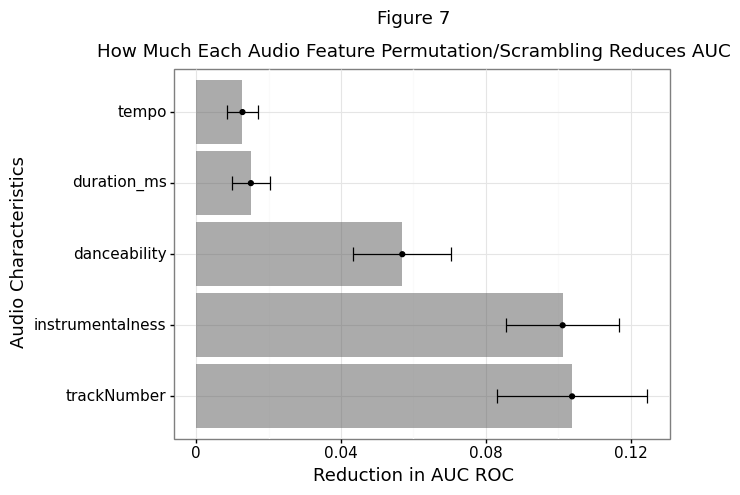

<ggplot: (94610591555)>


In [52]:
# Plot

top5Var = (
    vi_dat >>
    mask(X.vi > 0.01) >>
    arrange(X.vi, ascending = False)
)
p = (
    top5Var >>
    ggplot(
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    
    # Error bars
    geom_errorbar(aes(ymin="low", ymax="high"), width=.2) +
    theme_bw() +
    
    # Ordering the variables by level of importance
    scale_x_discrete(limits = top5Var.variable.tolist()) +
    coord_flip() +
    
    labs(
        y="Reduction in AUC ROC",
        x="Audio Characteristics",
        title = "Figure 7\n\nHow Much Each Audio Feature Permutation/Scrambling Reduces AUC"
    ) +
    
    theme(axis_text = element_text(color = "black", size = 11)) +
    theme(axis_title = element_text(color = "black", size = 13))
)
ggsave(plot = p, filename = "Data/Important_Variables")
print(p)

The most important characteristics appear to be: instrumentalness, track number, danceability. Note that instrumentalness and track number are virtually the same important. To a lesser extent, the variables are: duration, tempo, and speechiness.

In [36]:
# Instantiate the model class
# using the best parameters
rf = RF(n_estimators= 600, max_depth = 5)
importantFeatures = ["trackNumber", "instrumentalness", "danceability", "tempo", 
                     "duration_ms"]
# gnb.fit(X_train.iloc[:,7:X_train.shape[1]], Y_train) # Train
rf.fit(X_train[importantFeatures], Y_train)

# Predict 
# y_pred = gnb.predict(X_test.iloc[:,7:X_test.shape[1]])
y_pred = rf.predict(X_test[importantFeatures])

# Out-of-sample performance 
print("Accuracy Score:", m.accuracy_score(Y_test, y_pred))
print("ROC AUC Score:", m.roc_auc_score(Y_train, rf_mod.predict(X_train)))
print("Mean Squared Error:", m.mean_squared_error(Y_test, y_pred))

Accuracy Score: 0.8132045088566827
ROC AUC Score: 0.8431264728986645
Mean Squared Error: 0.18679549114331723


Our accuracy is about 82.13%, with ROC AUC score as 84.14%.

### Ice Plots

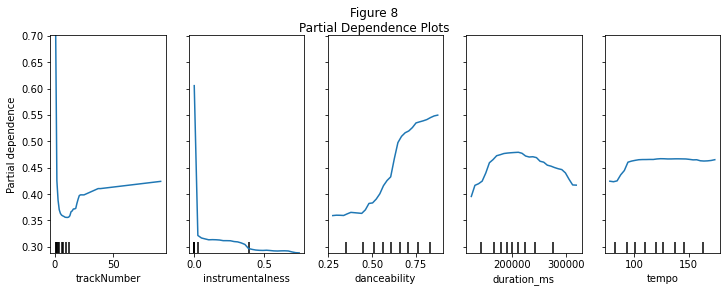

In [53]:
# Target specific features
# Grab variables that matter..
features = ['trackNumber','instrumentalness','danceability','duration_ms','tempo']

# Calculate the partial dependency
# On average, how much does ROC differ when age is set to 17, for example.
# What is the average prediction?
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Figure 8\nPartial Dependence Plots")
display = plot_partial_dependence(
    rf_mod, X_train, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)
fig.savefig(fname = "Data/Individual_Partial_Dependence.png")

The track number sees the biggest shift in predictive accuracy wheras as tempo changes, the predictive accuracy does not change much. For track number, the chance of the song being a hit is high when the song is the first song in the album. The probability drastically decreases the further down the album the song is.

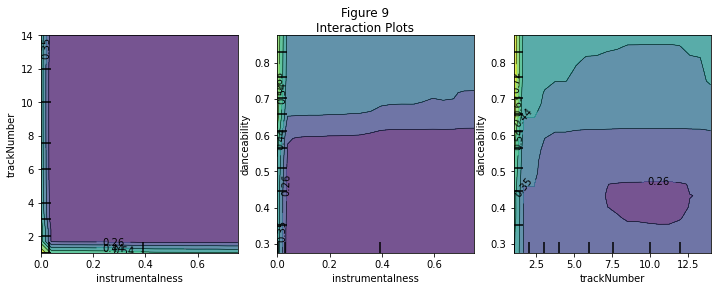

In [54]:
# Feed in the interaction as a nested list
# Set 2nd variable to a specific value
# Spawn a heat map
# Intensity of heatmap corresponds to prediction
# Takes a longer time because we are doing 2 manipulations
# Choose: 'instrumentalness', 'trackNumber', 'danceability',
interacted_features = [["instrumentalness","trackNumber"],
                       ["instrumentalness","danceability"],
                       ["trackNumber","danceability"]
                      ] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Figure 9\nInteraction Plots")
display = plot_partial_dependence(
    rf_mod, X_train, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20, ax=ax,
)
fig.savefig(fname = "Data/Interaction_Plots.png")

Lighter colors mean a higher predictive accuracy. It appears that there is little interaction between track number and instrumentalness. However, it appears that a song is more likely to become a hit the higher its danceability. Furthermore, it appears that a song is most likely to become a hit if its position in an album is low and is quite danceable. However, these relationships could be a correlation, not causation.

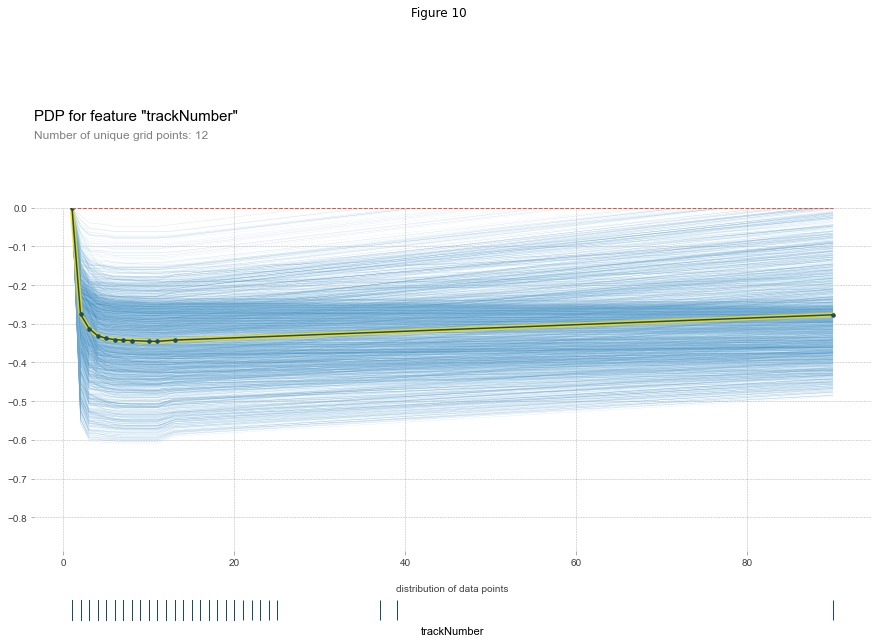

In [57]:
pdp_dist = pdp.pdp_isolate(model = rf_mod, 
                           dataset = X_train,
                           model_features = X_train.columns.tolist(),
                           feature="trackNumber", num_grid_points=16)

fig,ax = pdp.pdp_plot(pdp_dist, "trackNumber", plot_pts_dist=True,
                      center = True,
                      plot_lines=True, # ICE part                          

                      figsize=(15,10))
fig.suptitle("Figure 10")

fig.savefig(fname = "Data/PDP_trackNumber.png")

Partial dependency plots predict how much the average prediction changes when the chosen variable changes. Note: I centered the plot around the baseline (minimum) value of the variable of interest to better interpret the plot. The first songs in the albums have the highest predictive accuracy of whether a song becomes a hit. 

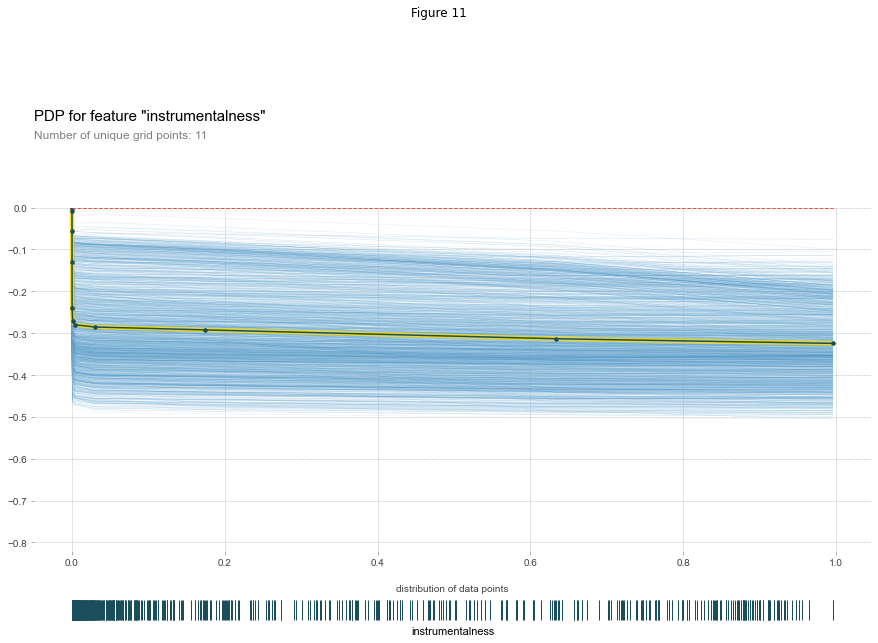

In [58]:
pdp_dist = pdp.pdp_isolate(model = rf_mod, 
                           dataset = X_train,
                           model_features = X_train.columns.tolist(),
                           feature="instrumentalness", num_grid_points=16)

fig,ax = pdp.pdp_plot(pdp_dist, "instrumentalness", plot_pts_dist=True,
                      center = True,
                      plot_lines=True, # ICE part                          

                      figsize=(15,10))
fig.suptitle("Figure 11")

fig.savefig(fname = "Data/PDP_instrumentalness.png")

The more instrumental a song is, the lower the probability of the song becoming a hit in the UK.